## Action Learning 5
- Build a Linear Regression model for Years of Experience (X) vs Salary (Y).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df = pd.read_csv('contents/Exp_Salary.csv')

df.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [6]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.shape

(30, 2)

In [9]:
X, y = df[['YearsExperience']], df['Salary']

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

#Fitting the LinearRegression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)  # Vector

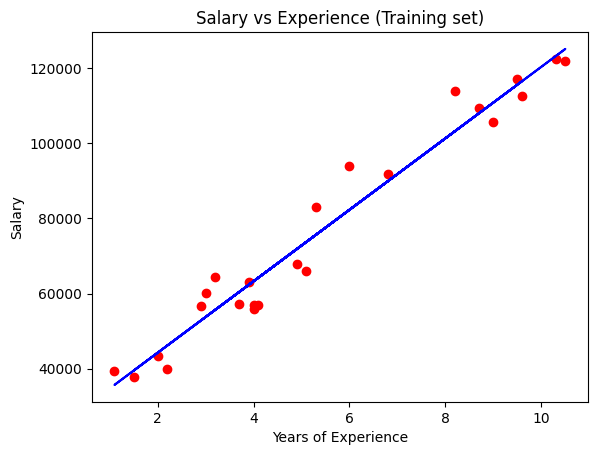

In [16]:
# Visualising the Train set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
y_pred2=regressor.predict(X_train)  # Vector

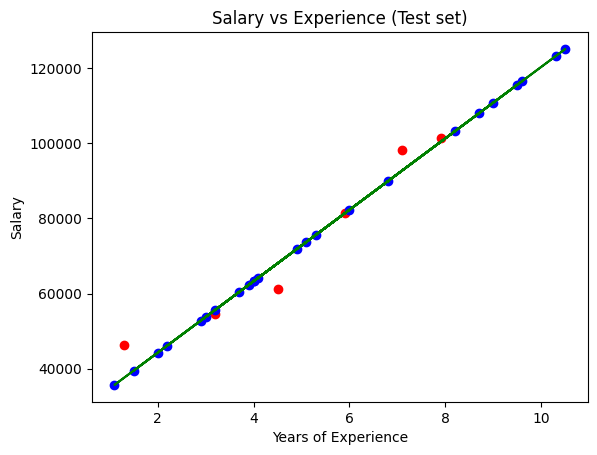

In [18]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, y_pred2, color = 'blue')
plt.plot(X_train, y_pred2, color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

MAE 3867.4744922769446
MSE 25774164.367154535
R2 0.9429269163491423


In [22]:
y_pred = regressor.predict(X.iloc[[0]])  # Using the first row of X which has 1.1 years
print(y_pred)

[35704.59911149]


In [26]:
while True:
    try:
        years = float(input("Enter Years of Experience: "))
        if years < 0:
            print("Please enter a positive number for years of experience.")
            continue
        pred_salary = regressor.predict(pd.DataFrame([[years]], columns=['YearsExperience']))
        print(f"Predicted Salary (exp: {years}): {pred_salary[0]:,.2f}/-")
        continue_choice = input("Do you want to predict another salary? (y/n): ").lower().strip()
        if continue_choice in ['n', 'no']:
            break
    except ValueError:
        print("Please enter a valid number.")
    except KeyboardInterrupt:
        print("\nProgram interrupted by user.")
        break
    except Exception as e:
        print(f"An error occurred: {e}")
        break

Predicted Salary (exp: 10.0): 120,343.57/-
Predicted Salary (exp: 5.0): 72,793.58/-
Predicted Salary (exp: 6.0): 82,303.58/-
